<h1>Creencia

In [2]:
import pandas as pd
from matplotlib.pyplot import xticks
from networkx.algorithms.threshold import betweenness_sequence

df = pd.read_excel("porteDeArmasLegal.xlsx")
df.head()

,Marca temporal,Correo electrónico,Comentario,autoclasificacion
0,2024-08-28 11:01:54.416,sofitu0007@gmail.com,Eso es tener mucha confianza en la gente,En desacuerdo
1,2024-08-28 11:02:00.934,brayansl0523@gmail.com,"No considero que deba ser así, ya que, a pesar...",En desacuerdo
2,2024-08-28 11:02:03.912,cardenas.luisa@correounivalle.edu.co,Si total,De acuerdo
3,2024-08-28 11:02:04.274,calrare@gmail.com,"En una sociedad llena de odio, rencor y múltip...",Completamente en desacuerdo
4,2024-08-28 11:02:07.032,tatianatellezmillan@gmail.com,Esto se daría a situaciones no deseadas,En desacuerdo


In [3]:
from collections import defaultdict
from processData import clean_text
user_comments = defaultdict(set)
for _, row in df.iterrows():
    email = row["Correo electrónico"]
    comment = clean_text(row["Comentario"])
    if pd.notna(comment):
        user_comments[email].add(comment)

users = list(user_comments.keys())
users_tweet_text = [user_comments[user] for user in users]

topic_info = {
    "topic": "el porte legal de armas",
    "topic_context": "Se le consultó a un grupo de personas su opinion frente a la legalización del porte de armas en Colombia"
}



In [3]:
from main import calculate_beliefs
beliefs = calculate_beliefs(users_tweet_text, users,  topic_info)
beliefs

KeyboardInterrupt: 

KeyboardInterrupt: 

In [11]:
beliefs_df = pd.DataFrame(list(beliefs.items()), columns=["Correo electrónico", "creencia_estim"])
# Unir el DataFrame de creencias con el DataFrame original
df_merge = pd.merge(df, beliefs_df, on="Correo electrónico", how="left")
df_merge

,Marca temporal,Correo electrónico,Comentario,autoclasificacion,creencia_estim
0,2024-08-28 11:01:54.416,sofitu0007@gmail.com,Eso es tener mucha confianza en la gente,En desacuerdo,0.50
1,2024-08-28 11:02:00.934,brayansl0523@gmail.com,"No considero que deba ser así, ya que, a pesar...",En desacuerdo,0.20
2,2024-08-28 11:02:03.912,cardenas.luisa@correounivalle.edu.co,Si total,De acuerdo,1.00
3,2024-08-28 11:02:04.274,calrare@gmail.com,"En una sociedad llena de odio, rencor y múltip...",Completamente en desacuerdo,0.01
4,2024-08-28 11:02:07.032,tatianatellezmillan@gmail.com,Esto se daría a situaciones no deseadas,En desacuerdo,0.20
...,...,...,...,...,...
96,2024-08-28 11:07:58.993,ernestocabrerapantoja@gmail.com,De acuerdo que la gente tenga derecho a portar...,Ni de acuerdo ni en desacuerdo,0.60
97,2024-08-28 11:08:03.714,bexter.pope@gmail.com,Por qué los civiles necesitan armas diseñadas ...,En desacuerdo,0.05
98,2024-08-28 11:08:07.445,sarahnuc8@gmail.com,"Al permitir esto, estoy segura que abriría una...",Completamente en desacuerdo,0.01
99,2024-08-28 11:08:20.263,nicole_carabali_camacho@carbonellcali.com,"Nah, pa mi, esto facilita la formación de prob...",En desacuerdo,0.10


In [12]:
likert_map = {
    "Completamente en desacuerdo": 0.0,
    "En desacuerdo": 0.25,
    "Ni de acuerdo ni en desacuerdo": 0.5,
    "De acuerdo": 0.75,
    "Completamente de acuerdo": 1.0
}
df_merge["creencia_autoreportada"] = df_merge["autoclasificacion"].map(likert_map)
df_merge

,Marca temporal,Correo electrónico,Comentario,autoclasificacion,creencia_estim,creencia_autoreportada
0,2024-08-28 11:01:54.416,sofitu0007@gmail.com,Eso es tener mucha confianza en la gente,En desacuerdo,0.50,0.25
1,2024-08-28 11:02:00.934,brayansl0523@gmail.com,"No considero que deba ser así, ya que, a pesar...",En desacuerdo,0.20,0.25
2,2024-08-28 11:02:03.912,cardenas.luisa@correounivalle.edu.co,Si total,De acuerdo,1.00,0.75
3,2024-08-28 11:02:04.274,calrare@gmail.com,"En una sociedad llena de odio, rencor y múltip...",Completamente en desacuerdo,0.01,0.00
4,2024-08-28 11:02:07.032,tatianatellezmillan@gmail.com,Esto se daría a situaciones no deseadas,En desacuerdo,0.20,0.25
...,...,...,...,...,...,...
96,2024-08-28 11:07:58.993,ernestocabrerapantoja@gmail.com,De acuerdo que la gente tenga derecho a portar...,Ni de acuerdo ni en desacuerdo,0.60,0.50
97,2024-08-28 11:08:03.714,bexter.pope@gmail.com,Por qué los civiles necesitan armas diseñadas ...,En desacuerdo,0.05,0.25
98,2024-08-28 11:08:07.445,sarahnuc8@gmail.com,"Al permitir esto, estoy segura que abriría una...",Completamente en desacuerdo,0.01,0.00
99,2024-08-28 11:08:20.263,nicole_carabali_camacho@carbonellcali.com,"Nah, pa mi, esto facilita la formación de prob...",En desacuerdo,0.10,0.25


In [13]:
incorrect = df_merge[df_merge["creencia_autoreportada"] != df_merge["creencia_estim"]][["Comentario","error_clasificacion", "Correo electrónico", "creencia_autoreportada", "creencia_estim" ]]
incorrect

KeyError: "['error_clasificacion'] not in index"

In [7]:
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


df_eval = df_merge.dropna(subset=["creencia_estim", "creencia_autoreportada"])

# Error absoluto medio
mae = mean_absolute_error(df_eval["creencia_autoreportada"], df_eval["creencia_estim"])
print(f"Error absoluto medio: {mae:.3f}")

Error absoluto medio: 0.137


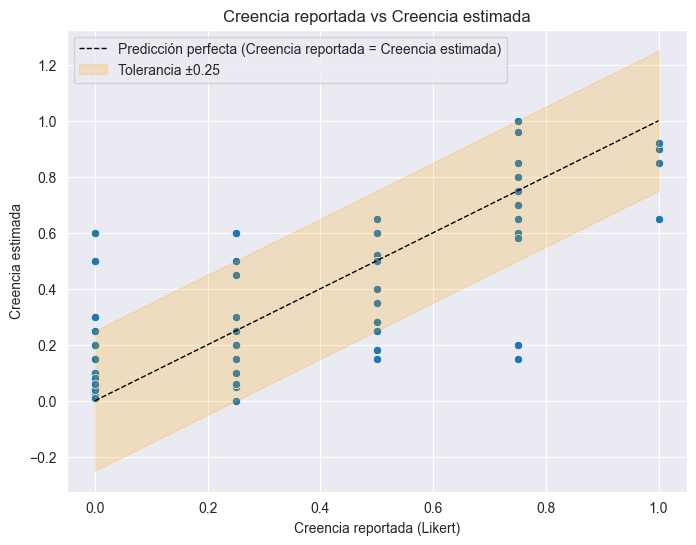

In [18]:
import numpy as np

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_eval, x="creencia_autoreportada", y="creencia_estim")

# Línea ideal
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Predicción perfecta (Creencia reportada = Creencia estimada)")

# Banda de tolerancia de ±0.1
x_vals = np.linspace(0, 1, 100)
plt.fill_between(x_vals, x_vals - 0.25, x_vals + 0.25, color='orange', alpha=0.2, label="Tolerancia ±0.25")

plt.xlabel("Creencia reportada (Likert)")
plt.ylabel("Creencia estimada")
plt.title("Creencia reportada vs Creencia estimada")
plt.grid(True)
plt.legend()
plt.show()


<h1>Confianza

In [1]:
import pandas as pd

df = pd.read_excel("reformaSaludGen.xlsx")
df.head()

,userId,comentario,confianza
0,user001,Eliminar la intermediación financiera puede so...,0.5
1,user002,La reforma de la salud es un salto al vacío. E...,1.0
2,user003,Vi un informe sobre el aumento de deudas en la...,0.1
3,user004,Leí por ahí que las tutelas en salud han subid...,0.1
4,user005,"Según Supersalud, la fragmentación del sistema...",0.5


In [3]:
from collections import defaultdict
from processData import clean_text
user_comments = defaultdict(set)
for _, row in df.iterrows():
    userId = row["userId"]
    comment = clean_text(row["comentario"])
    if pd.notna(comment):
        user_comments[userId].add(comment)

users = list(user_comments.keys())
users_tweet_text = [user_comments[user] for user in users]

topic_info = {
    "topic": "Reforma al sistema de salud",
    "topic_context": "El gobierno actual ha presentado al congreso su proyecto de ley, que entre otras cosas elimina la protección financiera, támbien llamada intermediación financiera"
}

In [3]:
from main import calculate_confidences
def calc_confidences(weight_extremism):
    return calculate_confidences(beliefs, weight_extremism=weight_extremism)

calc_confidences(0.0)

C:\Users\jujov\TG_code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'user001': 0.382,
 'user002': 0.751,
 'user003': 0.382,
 'user004': 0.567,
 'user005': 0.078,
 'user006': 0.567,
 'user007': 0.751,
 'user008': 0.106,
 'user009': 0.198,
 'user010': 0.567,
 'user011': 0.29,
 'user012': 0.659,
 'user013': 0.567,
 'user014': 0.29,
 'user015': 0.751,
 'user016': 0.106,
 'user017': 0.567,
 'user018': 0.631,
 'user019': 0.475,
 'user020': 0.447,
 'user021': 0.382,
 'user022': 0.475,
 'user023': 0.447,
 'user024': 0.263,
 'user025': 0.751,
 'user026': 0.382,
 'user027': 0.567,
 'user028': 0.631,
 'user029': 1.0,
 'user030': 1.0,
 'user031': 0.816,
 'user032': 0.816,
 'user033': 0.908,
 'user034': 0.724,
 'user035': 0.724,
 'user036': 0.816,
 'user037': 1.0,
 'user038': 0.724,
 'user039': 0.816,
 'user040': 1.0,
 'user041': 0.908,
 'user042': 0.724,
 'user043': 0.908,
 'user044': 1.0,
 'user045': 0.724,
 'user046': 0.816,
 'user047': 0.816,
 'user048': 0.908,
 'user049': 1.0,
 'user050': 0.908,
 'user051': 0.724,
 'user052': 0.724,
 'user053': 0.724,
 'user0

In [2]:
#from main import calculate_beliefs
#beliefs = calculate_beliefs(users_tweet_text, users, topic_info)
import json
with open('Evaluation/beliefSalud.json', 'r') as f:
    beliefs = json.loads(f.read())
beliefs

{'user001': 0.25,
 'user002': 0.05,
 'user003': 0.25,
 'user004': 0.15,
 'user005': 0.5,
 'user006': 0.15,
 'user007': 0.05,
 'user008': 0.4,
 'user009': 0.35,
 'user010': 0.15,
 'user011': 0.3,
 'user012': 0.1,
 'user013': 0.15,
 'user014': 0.3,
 'user015': 0.05,
 'user016': 0.4,
 'user017': 0.15,
 'user018': 0.8,
 'user019': 0.2,
 'user020': 0.7,
 'user021': 0.25,
 'user022': 0.2,
 'user023': 0.7,
 'user024': 0.6,
 'user025': 0.05,
 'user026': 0.25,
 'user027': 0.15,
 'user028': 0.8,
 'user029': 1.0,
 'user030': 1.0,
 'user031': 0.9,
 'user032': 0.9,
 'user033': 0.95,
 'user034': 0.85,
 'user035': 0.85,
 'user036': 0.9,
 'user037': 1.0,
 'user038': 0.85,
 'user039': 0.9,
 'user040': 1.0,
 'user041': 0.95,
 'user042': 0.85,
 'user043': 0.95,
 'user044': 1.0,
 'user045': 0.85,
 'user046': 0.9,
 'user047': 0.9,
 'user048': 0.95,
 'user049': 1.0,
 'user050': 0.95,
 'user051': 0.85,
 'user052': 0.85,
 'user053': 0.85,
 'user054': 0.95,
 'user055': 0.85,
 'user056': 0.95,
 'user057': 0.85,

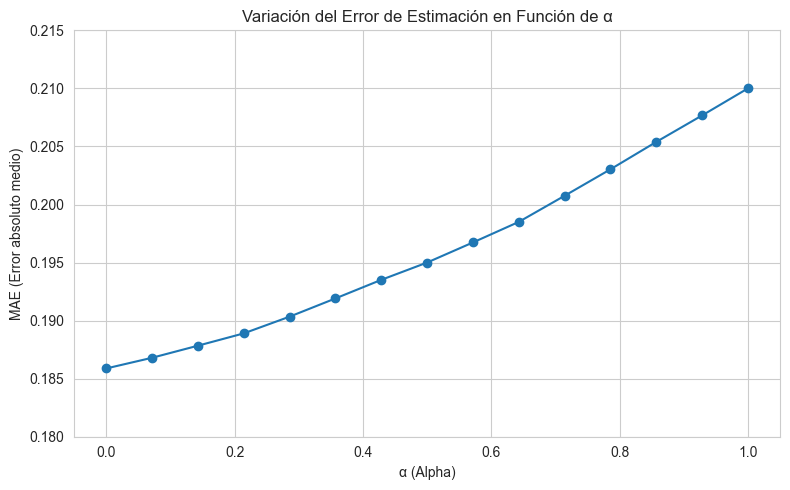

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
weights = np.linspace(0, 1, 15)  # 21 valores de 0.0 a 1.0
errors = []

for w in weights:
    pred = calc_confidences(w)
    pred_series = pd.Series(pred)
    merged = df.set_index('userId').join(pred_series.rename('pred_confianza'))
    mae = mean_absolute_error(merged['confianza'], merged['pred_confianza'])
    errors.append(mae)


plt.figure(figsize=(8,5))
plt.plot(weights, errors, marker='o')
plt.title('Variación del Error de Estimación en Función de α')
plt.xlabel('α (Alpha)')
plt.ylabel('MAE (Error absoluto medio)')
plt.grid(True)
plt.ylim(0.180, 0.215)
plt.tight_layout()
plt.show()


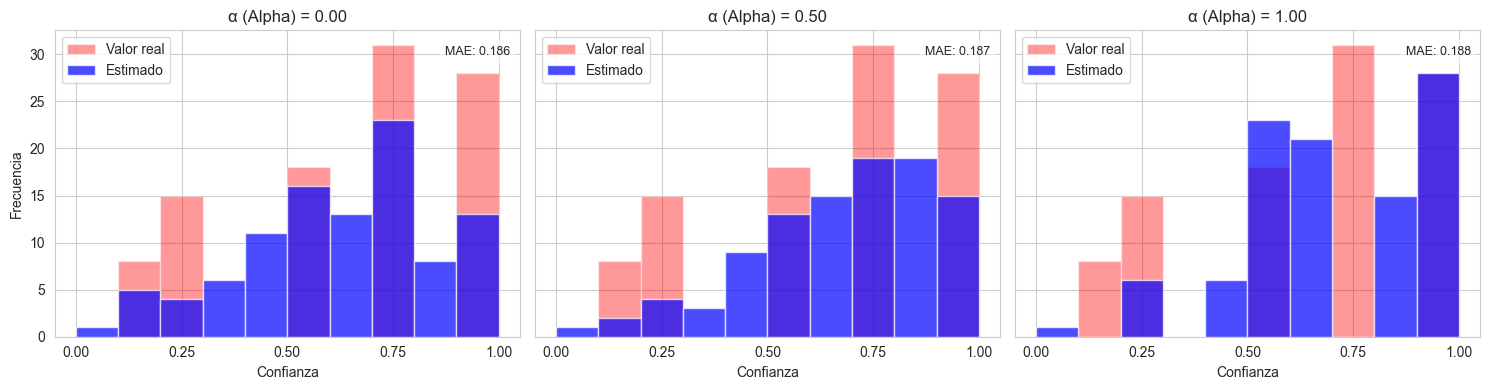

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from main import calculate_confidences

alphas = np.linspace(0, 1, 3)


valores_reales = df.set_index('userId')['confianza']

n = len(alphas)
nrows = 1
ncols = int(np.ceil(n / nrows))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows), sharey=True)
plt.setp(axes, xticks=[0.0, 0.25, 0.5, 0.75, 1.0])
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    pred_dict = calculate_confidences(beliefs, weight_extremism=alpha)
    valores_estimados = pd.Series(pred_dict)

    comunes = valores_reales.index.intersection(valores_estimados.index)
    reales = valores_reales.loc[comunes]
    estimados = valores_estimados.loc[comunes]

    ax = axes[i]
    ax.hist(reales, bins=np.linspace(0, 1, 11), alpha=0.4, label='Valor real', color='red')
    ax.hist(estimados, bins=np.linspace(0, 1, 11), alpha=0.7, label='Estimado', color='blue')

    ax.set_title(f'α (Alpha) = {alpha:.2f}')
    ax.set_xlabel('Confianza')

    if i % ncols == 0:
        ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.text(0.98, 0.95, f'MAE: {errors[i]:.3f}', transform=ax.transAxes,
            ha='right', va='top', fontsize=9, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

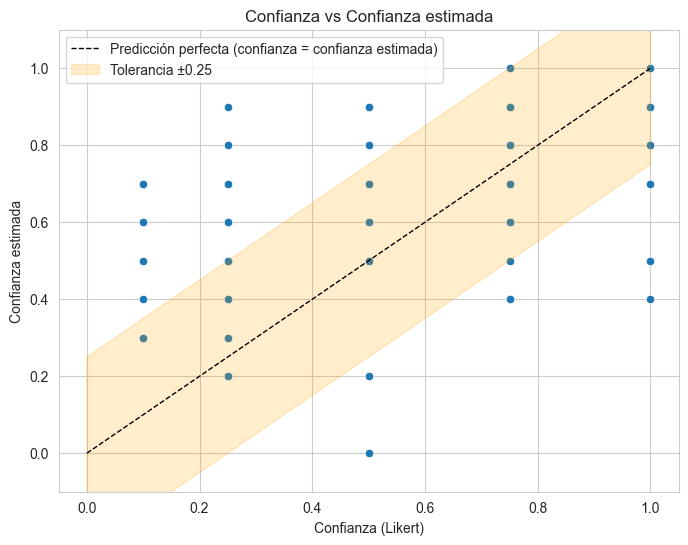

In [24]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x="confianza", y="pred_confianza")

# Línea ideal
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Predicción perfecta (confianza = confianza estimada)")

# Banda de tolerancia de ±0.1
x_vals = np.linspace(0, 1, 100)
plt.fill_between(x_vals, x_vals - 0.25, x_vals + 0.25, color='orange', alpha=0.2, label="Tolerancia ±0.25")

plt.xlabel("Confianza (Likert)")
plt.ylabel("Confianza estimada")
plt.title("Confianza vs Confianza estimada")
plt.ylim(-0.1,1.1)
plt.grid(True)
plt.legend()
plt.show()

<h1>Influencia

In [1]:
import pandas as pd
from processData import preprocess_dataframe
from influenceHeuristics import identify_nodes
from typing import Dict

df = pd.read_csv("Evaluation/ReformaPensional10000.csv")
df = preprocess_dataframe(df)
users = identify_nodes(df)
user_to_index: Dict[str, int] = {user: idx for idx, user in enumerate(users)}

df

C:\Users\jujov\TG_code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,text,created_at,public_metrics,entities,author_username,ref_type,ref_author,ref_text,ref_note_tweet
0,@petrogustavo Ahora son los ancianos la CORTIN...,2024-06-22 23:59:46+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 13, 'usernam...",JULIOTORRESB3,replied_to,petrogustavo,No entiendo la inquina contra millones de anci...,No entiendo la inquina contra millones de anci...
1,RT @ThomasitaD: Se oponen a la reforma pension...,2024-06-22 23:59:42+00:00,"{'retweet_count': 37, 'reply_count': 0, 'like_...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",CURTlSEOso,retweeted,ThomasitaD,Se oponen a la reforma pensional que le ofrece...,
2,RT @petrogustavo: A llenar la plaza de Bolívar...,2024-06-22 23:59:40+00:00,"{'retweet_count': 3585, 'reply_count': 0, 'lik...","{'mentions': [{'start': 3, 'end': 16, 'usernam...",defrankns,retweeted,petrogustavo,A llenar la plaza de Bolívar con la tercera ed...,
3,RT @RobertoMTico: No era éste👇payaso de David ...,2024-06-22 23:59:31+00:00,"{'retweet_count': 248, 'reply_count': 0, 'like...","{'mentions': [{'start': 3, 'end': 16, 'usernam...",HectorA87524815,retweeted,RobertoMTico,"No era éste👇payaso de David Luna, junto con el...",
4,RT @willj84753699: ¡ATENCIÓN COLOMBIA!\r\nAmig...,2024-06-22 23:59:22+00:00,"{'retweet_count': 292, 'reply_count': 0, 'like...","{'mentions': [{'start': 3, 'end': 17, 'usernam...",alperezv,retweeted,willj84753699,"¡ATENCIÓN COLOMBIA!\r\nAmigos, vamos con este ...",
...,...,...,...,...,...,...,...,...,...
9996,RT @PalomaValenciaL: Presentaré una demanda de...,2024-07-19 18:56:29+00:00,"{'retweet_count': 1556, 'reply_count': 0, 'lik...","{'annotations': [{'start': 112, 'end': 116, 'p...",MyriamEspitia1,retweeted,PalomaValenciaL,Presentaré una demanda de inconstitucionalidad...,
9997,RT @ChriGarces: Ante la @CConstitucional radic...,2024-07-19 18:56:26+00:00,"{'retweet_count': 9, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",naizir_mariana,retweeted,ChriGarces,Ante la @CConstitucional radicamos demanda con...,
9998,"RT @Wilson_Suaza_: Entonces, demandan la Refor...",2024-07-19 18:56:24+00:00,"{'retweet_count': 1021, 'reply_count': 0, 'lik...","{'annotations': [{'start': 41, 'end': 57, 'pro...",JuCaosocai,retweeted,Wilson_Suaza_,"Entonces, demandan la Reforma Pensional para q...",
9999,"RT @ElPensador75: Señores, estas dos ricachona...",2024-07-19 18:56:15+00:00,"{'retweet_count': 542, 'reply_count': 0, 'like...","{'annotations': [{'start': 49, 'end': 68, 'pro...",EdithPesantes,retweeted,ElPensador75,"Señores, estas dos ricachonas, María Fernanda ...",


In [2]:
from processData import get_mentions_list
mentions_list = []
for tweet_entities in df['entities'].dropna():
     tweet_mentions = get_mentions_list(tweet_entities)
     mentions_list.extend(tweet_mentions)
print("Cantidad de menciones:", len(mentions_list))
mentions_list

Cantidad de menciones: 12796


['petrogustavo',
 'ThomasitaD',
 'petrogustavo',
 'RobertoMTico',
 'willj84753699',
 'petrogustavo',
 'petrogustavo',
 'leaote',
 'CathyJuvinao',
 'liberalesbase',
 'petrogustavo',
 'DianaMunozC',
 'petrogustavo',
 'willj84753699',
 'petrogustavo',
 'leaote',
 'ManuelBeltrn14',
 'ManuelBeltrn14',
 'willj84753699',
 'petrogustavo',
 'petrogustavo',
 'petrogustavo',
 'Melquisedec70',
 'ManuelBeltrn14',
 'Melquisedec70',
 'Melquisedec70',
 'Melquisedec70',
 'petrogustavo',
 'FundLibreMente',
 'ManuelBeltrn14',
 'petrogustavo',
 'ThomasitaD',
 'CathyJuvinao',
 'Intidelaho2',
 'petrogustavo',
 'Melquisedec70',
 'petrogustavo',
 'willj84753699',
 'petrogustavo',
 'elcolombiano',
 'JOVENCD',
 'willj84753699',
 'petrogustavo',
 'petrogustavo',
 'willj84753699',
 'petrogustavo',
 'CasandroMartell',
 'petrogustavo',
 'GloriaRamirezRi',
 'papoaminCD',
 'petrogustavo',
 'petrogustavo',
 'petrogustavo',
 'JOVENCD',
 'petrogustavo',
 'petrogustavo',
 'JOVENCD',
 'JOVENCD',
 'Letrinas',
 'Rincon001A'

<h2>Interacciones

In [3]:
from influenceHeuristics import build_interaction_matrix
interactions_matrix, interactions_matrix_nonNorm, retweets_matrix, mentions_matrix = build_interaction_matrix(df, user_to_index)
interactions_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(7317, 7317))

In [4]:
from scipy.stats import spearmanr
interactions_flat, retweets_flat, mentions_flat = interactions_matrix.flatten(), retweets_matrix.flatten(), mentions_matrix.flatten()


rho_retweets, _ = spearmanr(interactions_flat, retweets_flat)
rho_mentions, _ = spearmanr(interactions_flat, mentions_flat)

print("Spearman con retweets:", f"{rho_retweets:.3f}")
print("Spearman con menciones:"f"{rho_mentions:.3f}")

Spearman con retweets: 0.807
Spearman con menciones:0.260


In [5]:
import numpy as np

pearson_retweets = np.corrcoef(interactions_flat, retweets_flat)[0, 1]
pearson_mentions = np.corrcoef(interactions_flat, mentions_flat)[0, 1]

print("Pearson con retweets:", f"{pearson_retweets:.3f}")
print("Pearson con menciones:", f"{pearson_mentions:.3f}")

Pearson con retweets: 0.792
Pearson con menciones: 0.290


<h2>Popularidad

In [6]:
from influenceHeuristics import build_popularity_influence_matrix
global_influence_matrix, betwenness_influence_matrix = build_popularity_influence_matrix(df, user_to_index, interactions_matrix_nonNorm)

global_influence_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(7317, 7317))

In [7]:
popularity_flat, betweenness_flat = global_influence_matrix.flatten(), betwenness_influence_matrix.flatten()

rho_popu_between, _ = spearmanr(popularity_flat, betweenness_flat)

print("Spearman con betweenness:", f"{rho_popu_between:.3f}")

Spearman con betweenness: 0.750


In [22]:
import numpy as np

pearson_popu_between = np.corrcoef(popularity_flat, betweenness_flat)[0, 1]

print("Pearson con betweenness:", f"{pearson_popu_between:.3f}")


Pearson con betweenness: 0.492


<h2>Afinidad

In [9]:
from processData import build_users_tweet_text
from main import calculate_beliefs

users_tweet_text = build_users_tweet_text(df, user_to_index)
topic_info = {
    "topic": "La reforma pensional en Colombia",
    "topic_context": "El gobierno del presidente Gustavo Petro presentó un proyecto de ley para reformar el sistema pensional, el cual fue aprobado con el apoyo de algunos sectores y cuestionado por otros."
}

stances = calculate_beliefs(users_tweet_text, users, topic_info, testing=True)
stances

{'SC_periodista': None,
 'HOLLMANMORRIS': None,
 'ContraGodarria': None,
 'johnjairoroldan': None,
 'cofradiacambio': None,
 'dussanja': None,
 'carolinacorcho': None,
 'GoogleColombia': None,
 'PartidoVerdeCoL': None,
 'IvanFinanciero': None,
 'GA_Jaramillo': None,
 'ColombiaHumana_': None,
 'velascolf': None,
 'CGR_Colombia': None,
 'PartidoASI_': None,
 'medum0879': None,
 'FLIP_org': None,
 'sirenita7': None,
 'MIgueBarretoC': None,
 'activosSAE': None,
 'usofrenteobrero': None,
 'bvcColombia': None,
 'CarlosAnSerrano': None,
 'DiegoASantos': None,
 'carlucas196364': None,
 'FaisalBorelly': None,
 'AELopezP': None,
 'NestorMoralesC': None,
 'flaenlinea': None,
 'Fedegan': None,
 'juanrobertovarg': None,
 'soyconservador': None,
 'RTVCes': None,
 'JotaPeHernandez': None,
 'MdeFrancisco12': None,
 'ivoox': None,
 'CCongresoCol': None,
 'NelsonCipagauta': None,
 'CARFColombia': None,
 'dianadiago': None,
 'opardor': None,
 'TheReaIJohn': None,
 'kcv': None,
 'FranciaMarquezM': None,
 

In [10]:
from influenceHeuristics import build_affinities_matrix
affinities_matrix = build_affinities_matrix(users_tweet_text, stances, {index: user for user, index in user_to_index.items()}, interactions_matrix_nonNorm, lambda x, y: None)

affinities_matrix

working...
calc embeddings: 66.3s
affinity work: count=20804400, 100.0%
calc similarity: 802.9s, calc affinities: 869.2s

affinity work: done


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(7317, 7317))

Spearman con agreement: 0.073


In [12]:
affinities_flat = affinities_matrix.flatten()
rho_aff_ret, _ = spearmanr(affinities_flat, retweets_flat)

print("Spearman con retweets:", f"{rho_aff_ret:.3f}")
pearson_aff_ret = np.corrcoef(affinities_flat, retweets_flat)[0, 1]

print("Pearson con retweets:", f"{pearson_aff_ret:.3f}")

Spearman con retweets: 0.093
Pearson con retweets: 0.053


In [15]:
def calc_spearman_rho(array1, array2):
    rho, _ = spearmanr(array1, array2)
    return f"{rho:.3f}"

def calc_pearson_rho(array1, array2):
    rho = np.corrcoef(array1, array2)[0, 1]
    return f"{rho:.3f}"

In [16]:
print("Interacciones con retweets:")
print("Spearman:", calc_spearman_rho(interactions_flat, retweets_flat))
print("Pearson:", calc_pearson_rho(interactions_flat, retweets_flat))
print("Interacciones con menciones:")
print("Spearman:", calc_spearman_rho(interactions_flat, mentions_flat))
print("Pearson:", calc_pearson_rho(interactions_flat, mentions_flat))
print("Interacciones con betweenness:")
print("Spearman:", calc_spearman_rho(interactions_flat, betweenness_flat))
print("Pearson:", calc_pearson_rho(interactions_flat, betweenness_flat))


Interacciones con retweets:
Spearman: 0.807
Pearson: 0.792
Interacciones con menciones:
Spearman: 0.260
Pearson: 0.290
Interacciones con betweenness:
Spearman: 0.621
Pearson: 0.478


In [20]:
print("Popularidad con retweets:")
print("Spearman:", calc_spearman_rho(popularity_flat, retweets_flat))
print("Pearson:", calc_pearson_rho(popularity_flat, retweets_flat))
print("Popularidad con menciones:")
print("Spearman:", calc_spearman_rho(popularity_flat, mentions_flat))
print("Pearson:", calc_pearson_rho(popularity_flat, mentions_flat))
print("Popularidad con betweenness:")
print("Spearman:", calc_spearman_rho(popularity_flat, betweenness_flat))
print("Pearson:", calc_pearson_rho(popularity_flat, betweenness_flat))

Popularidad con retweets:
Spearman: 0.697
Pearson: 0.693
Popularidad con menciones:
Spearman: 0.156
Pearson: 0.138
Popularidad con betweenness:
Spearman: 0.750
Pearson: 0.492


In [23]:
print("Afinidad con retweets:")
print("Spearman:", calc_spearman_rho(affinities_flat, retweets_flat))
print("Pearson:", calc_pearson_rho(affinities_flat, retweets_flat))
print("Afinidad con menciones:")
print("Spearman:", calc_spearman_rho(affinities_flat, mentions_flat))
print("Pearson:", calc_pearson_rho(affinities_flat, mentions_flat))
print("Afinidad con betweenness:")
print("Spearman:", calc_spearman_rho(affinities_flat, betweenness_flat))
print("Pearson:", calc_pearson_rho(affinities_flat, betweenness_flat))

Afinidad con retweets:
Spearman: 0.093
Pearson: 0.053
Afinidad con menciones:
Spearman: 0.006
Pearson: 0.002
Afinidad con betweenness:
Spearman: 0.066
Pearson: 0.027
